## Importing and installing libraries

In [11]:
%pip install --upgrade --quiet scikit-learn textblob matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Preprocess the datasets

In [ ]:
import pandas as pd

directory = '../../datasets/preprocessed_datasets/manual_annotations.csv'
df = pd.read_csv(directory)

In [21]:
for column in df.columns:
    if column != 'Text' and column != 'Index':
        for index, value in enumerate(df[column]):
            df.loc[index, column] = value[4:]

In [22]:
encoding_map = {'POS': 1, 'NEG': -1}
annotation_columns = ['CLA', 'JUS', 'DEP', 'FAI', 'CON', 'ENG', 'ACC', 'CST', 'NOV', 'ETH']
df[annotation_columns] = df[annotation_columns].map(lambda x: encoding_map.get(x, -1))

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_13176\156461228.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[annotation_columns] = df[annotation_columns].applymap(lambda x: encoding_map.get(x, -1))


In [23]:
column_rename_map = {
    'CLA': 'Clarity of Review',
    'JUS': 'Justification of Scores',
    'DEP': 'Depth of Analysis',
    'FAI': 'Fairness and Objectivity',
    'CON': 'Constructiveness of Feedback',
    'ENG': 'Engagement with Related Work',
    'ACC': 'Accuracy in Understanding',
    'CST': 'Consistency of Evaluation',
    'NOV': 'Identification of Novelty',
    'ETH': 'Ethical Considerations and Responsibility'
}

In [24]:
df.rename(columns=column_rename_map, inplace=True)

In [43]:
def preprocess(df):
    for column in df.columns:
        if column != 'Text' and column != 'Index':
            for index, value in enumerate(df[column]):
                df.loc[index, column] = value[4:]
    encoding_map = {'POS': 1, 'NEG': -1}
    annotation_columns = ['CLA', 'JUS', 'DEP', 'FAI', 'CON', 'ENG', 'ACC', 'CST', 'NOV', 'ETH']
    df[annotation_columns] = df[annotation_columns].map(lambda x: encoding_map.get(x, -1))
    df.rename(columns=column_rename_map, inplace=True)
    return df

In [25]:
df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,1,1,1,1,1,1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,1,1,1,1,1,-1,1,1,1,1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,1,1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,1,1,1,1,1,1,1,1,1,1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,-1,1,1,-1,1,1,1,1


In [7]:
df.describe()

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,0.545958,0.785161,0.796235,0.809524,0.574751,0.517165,0.794020,0.503876,0.211517,-0.678848
std,0.838277,0.619635,0.605323,0.587412,0.818782,0.856360,0.608229,0.864255,0.977916,0.734685
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Index                                      903 non-null    object
 1   Text                                       897 non-null    object
 2   Clarity of Review                          903 non-null    int64 
 3   Justification of Scores                    903 non-null    int64 
 4   Depth of Analysis                          903 non-null    int64 
 5   Fairness and Objectivity                   903 non-null    int64 
 6   Constructiveness of Feedback               903 non-null    int64 
 7   Engagement with Related Work               903 non-null    int64 
 8   Accuracy in Understanding                  903 non-null    int64 
 9   Consistency of Evaluation                  903 non-null    int64 
 10  Identification of Novelty             

## Manual Annotated Dataset Review

In [26]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

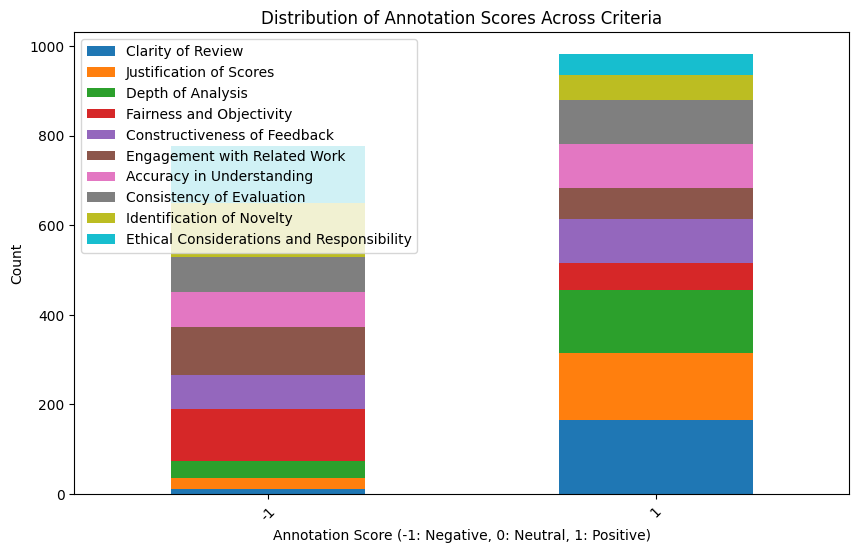

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

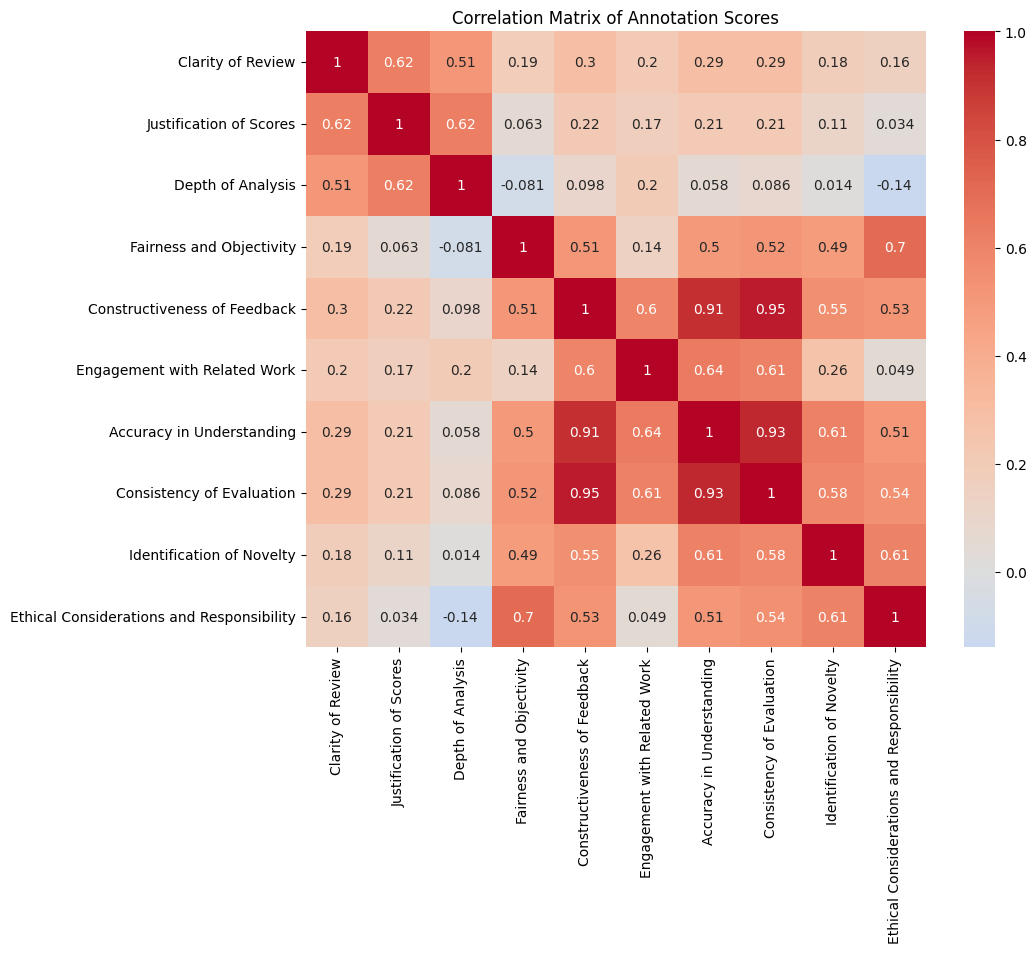

In [28]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [29]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
-1,11,26,36,116,76,108,78,78,120,129
1,165,150,140,60,100,68,98,98,56,47


In [30]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 1368), ('paper', 551), ('authors', 273), ('model', 238), ('results', 204), ('would', 197), ('learning', 189), ('data', 182), ('method', 175), ('2', 174)]


In [32]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                            0.056185
Justification of Scores                     -0.104631
Depth of Analysis                           -0.131426
Fairness and Objectivity                     0.049443
Constructiveness of Feedback                -0.005085
Engagement with Related Work                -0.081153
Accuracy in Understanding                    0.001496
Consistency of Evaluation                    0.044641
Identification of Novelty                    0.101914
Ethical Considerations and Responsibility    0.128048
Name: Sentiment, dtype: float64

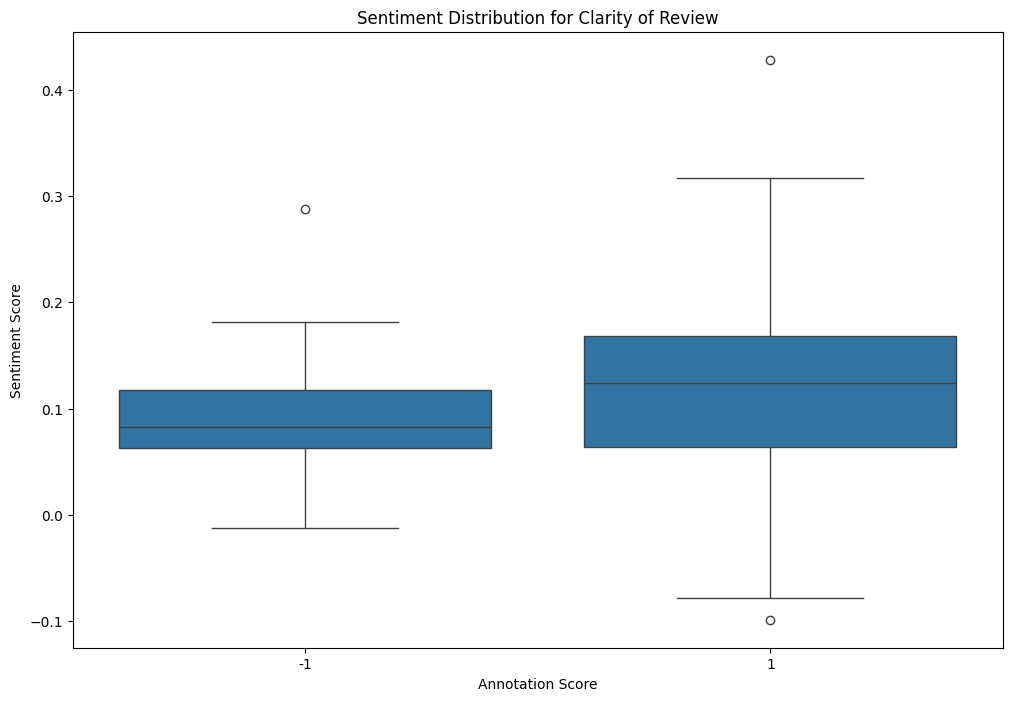

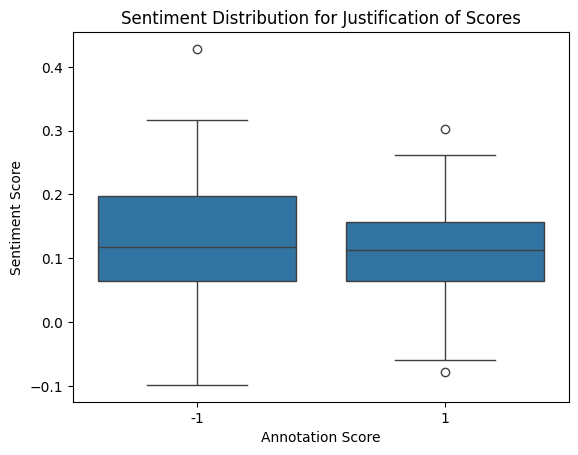

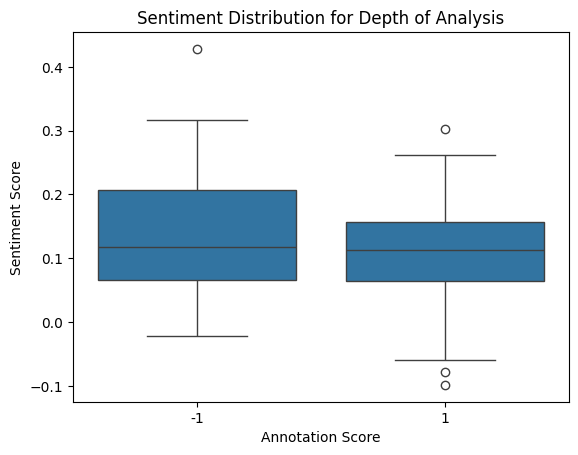

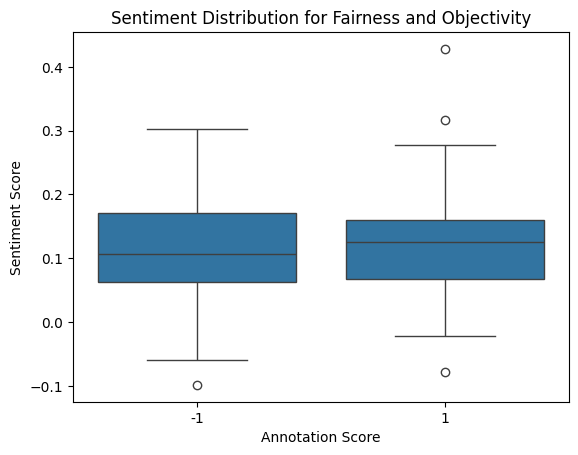

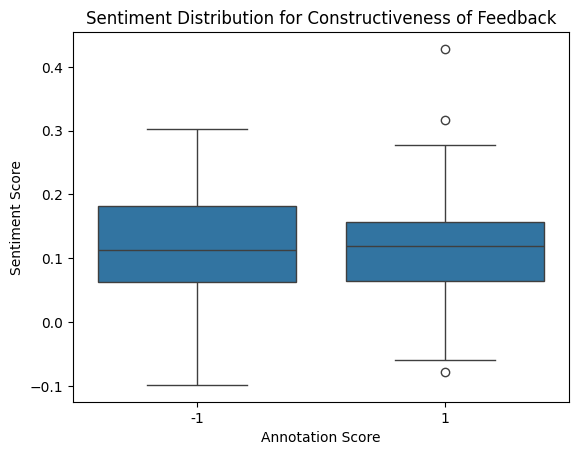

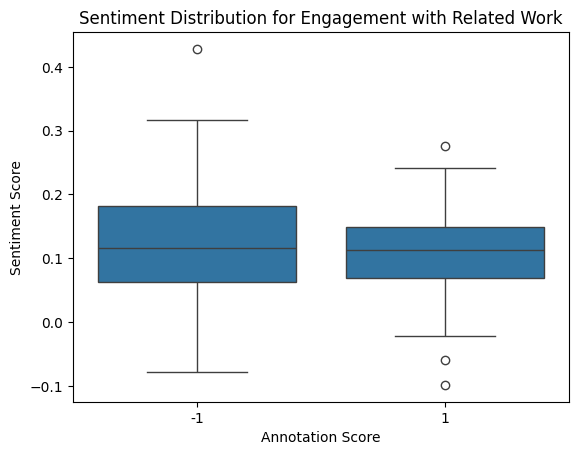

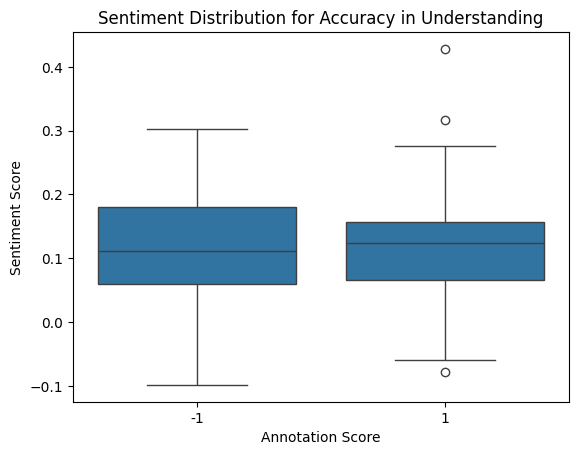

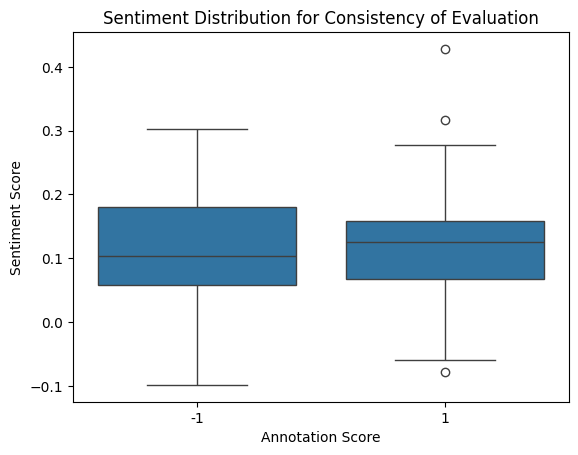

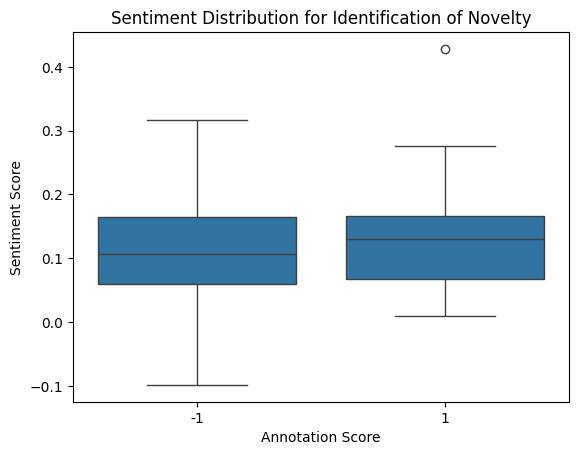

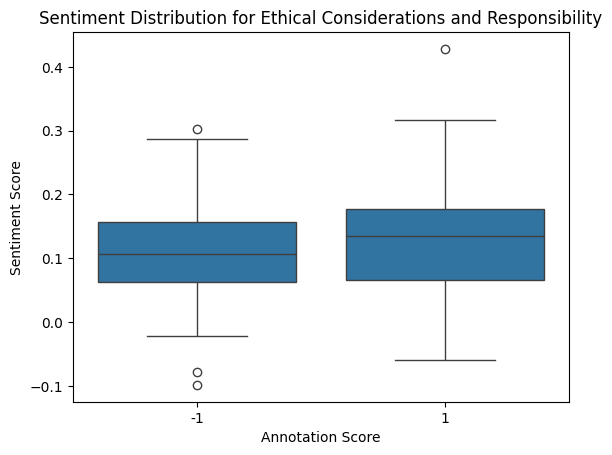

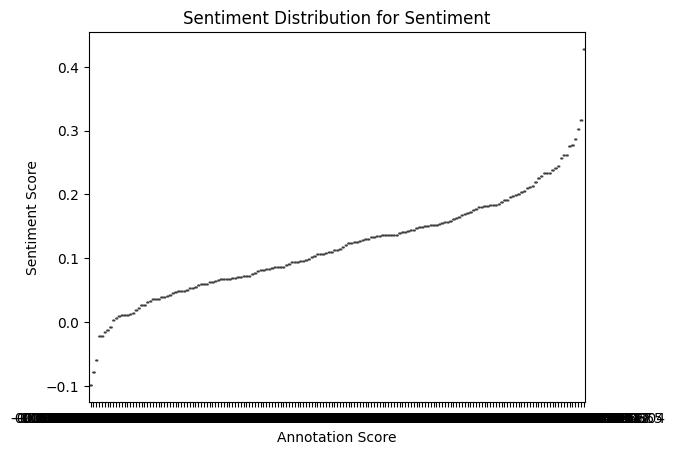

In [33]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

In [34]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                            0.875000
Justification of Scores                      0.704545
Depth of Analysis                            0.590909
Fairness and Objectivity                    -0.318182
Constructiveness of Feedback                 0.136364
Engagement with Related Work                -0.227273
Accuracy in Understanding                    0.113636
Consistency of Evaluation                    0.113636
Identification of Novelty                   -0.363636
Ethical Considerations and Responsibility   -0.465909
Sentiment                                    0.117467
dtype: float64

In [36]:
final_df = df.drop(columns=['Sentiment'])

In [37]:
final_df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,1,1,1,1,1,1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,1,1,1,1,1,-1,1,1,1,1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,1,1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,1,1,1,1,1,1,1,1,1,1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,-1,1,1,-1,1,1,1,1


In [ ]:
final_df.to_csv("../preprocessed/manually_annotated.csv")

## Llama Dataset Review

In [46]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

In [47]:
directory = '../../datasets/preprocessed_datasets/llama_annotations.csv'
df = pd.read_csv(directory)
df = preprocess(df)

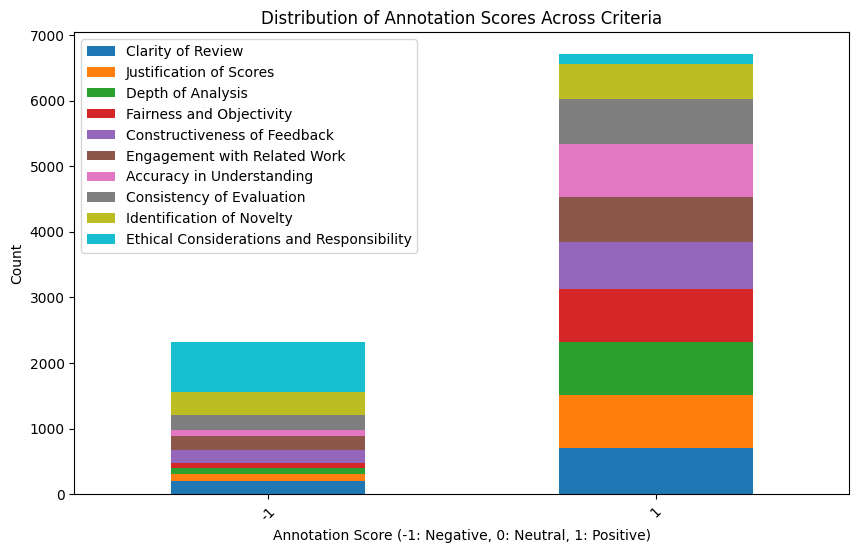

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

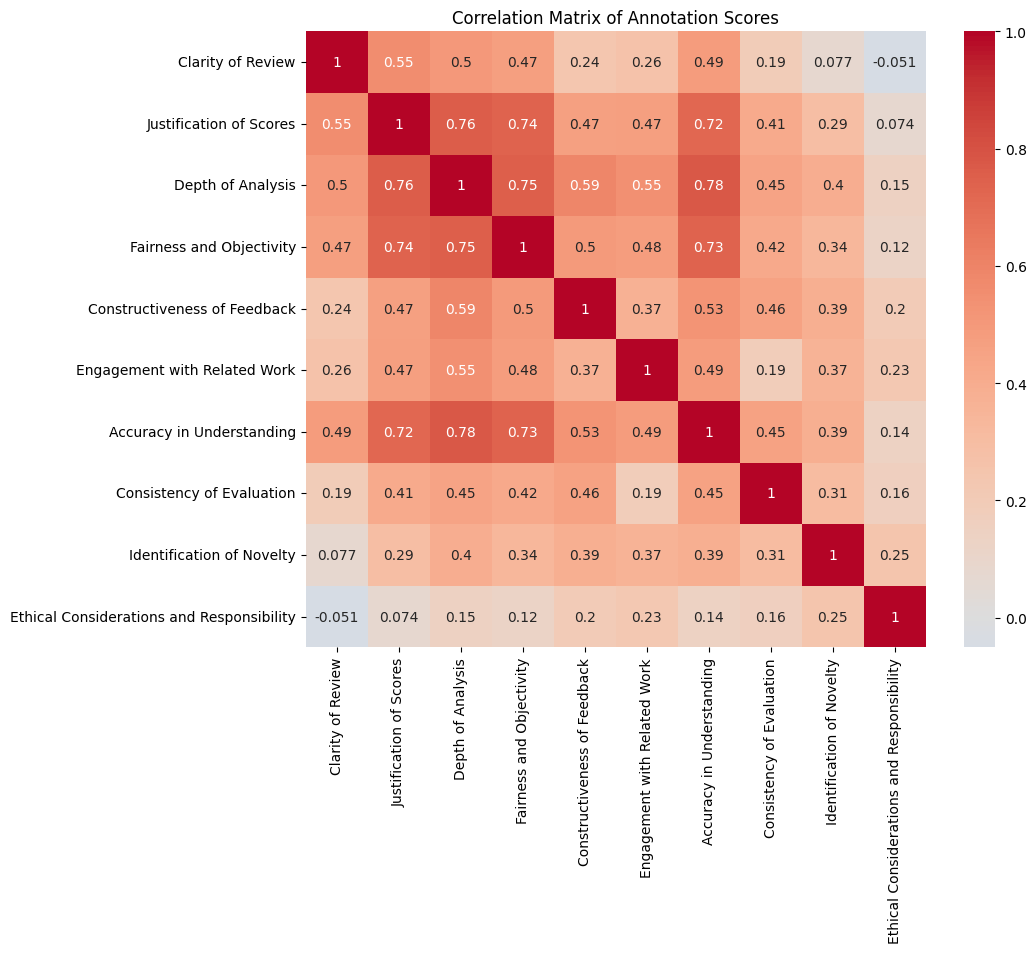

In [49]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [50]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
-1,205,97,92,86,192,218,93,224,356,758
1,698,806,811,817,711,685,810,679,547,145


In [51]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 6767), ('paper', 2786), ('authors', 1365), ('would', 1044), ('results', 1042), ('model', 1023), ('1', 927), ('proposed', 882), ('method', 877), ('learning', 841)]


In [53]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                            0.014219
Justification of Scores                      0.005675
Depth of Analysis                            0.039502
Fairness and Objectivity                     0.006412
Constructiveness of Feedback                 0.056739
Engagement with Related Work                 0.012297
Accuracy in Understanding                    0.024594
Consistency of Evaluation                    0.043515
Identification of Novelty                    0.159059
Ethical Considerations and Responsibility   -0.041622
Name: Sentiment, dtype: float64

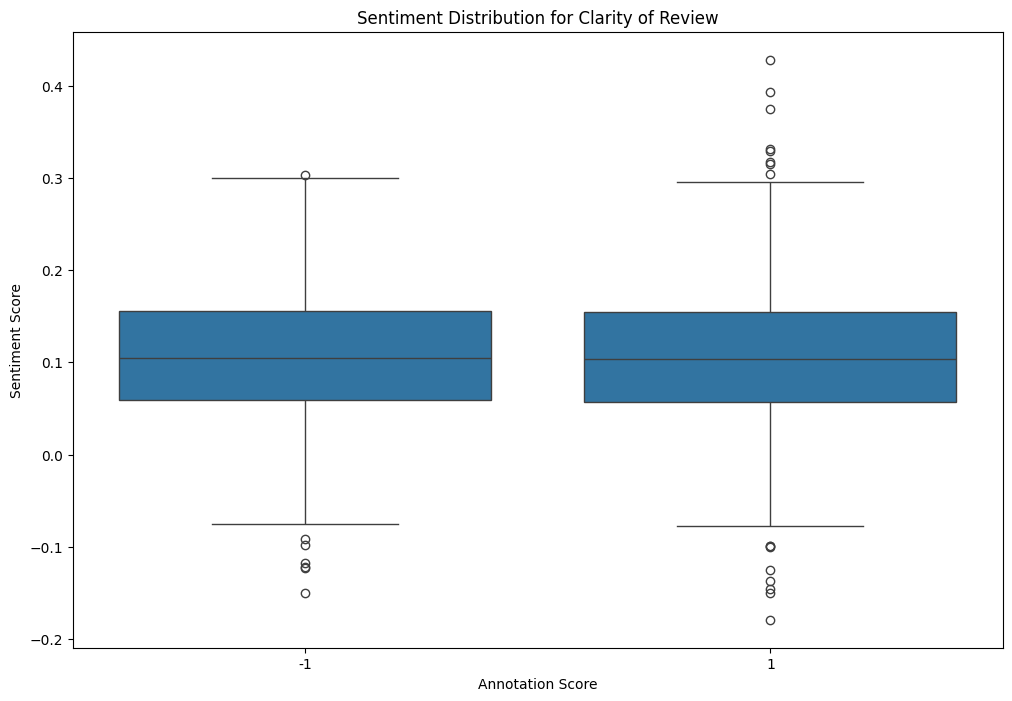

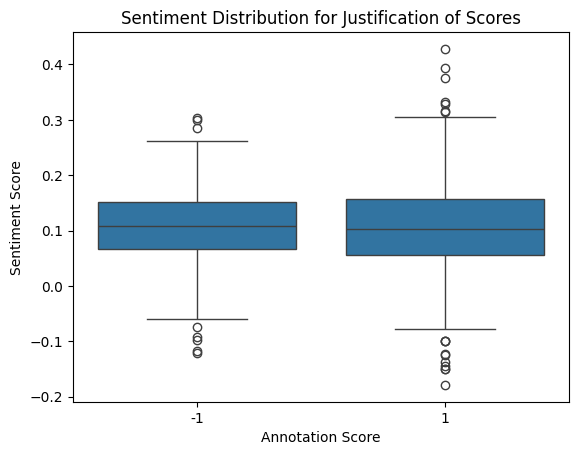

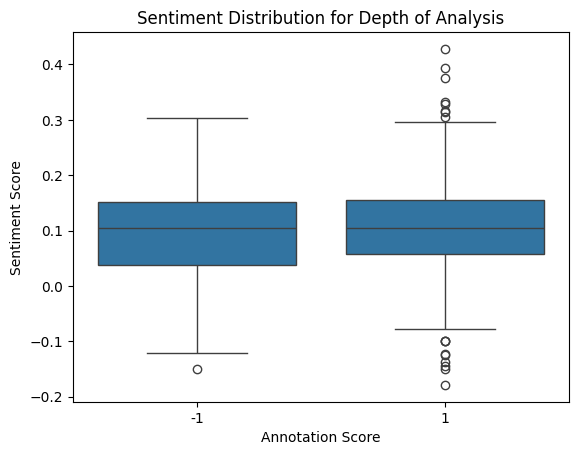

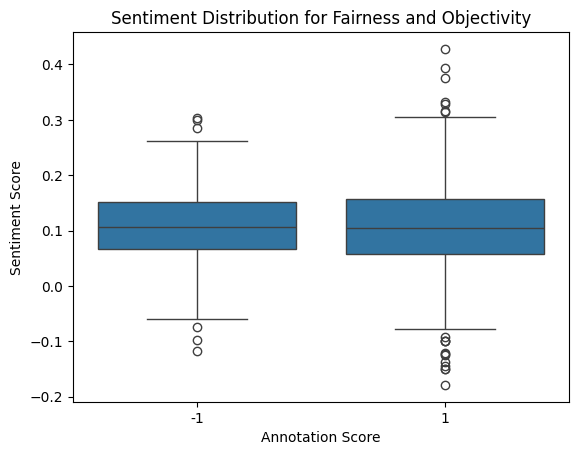

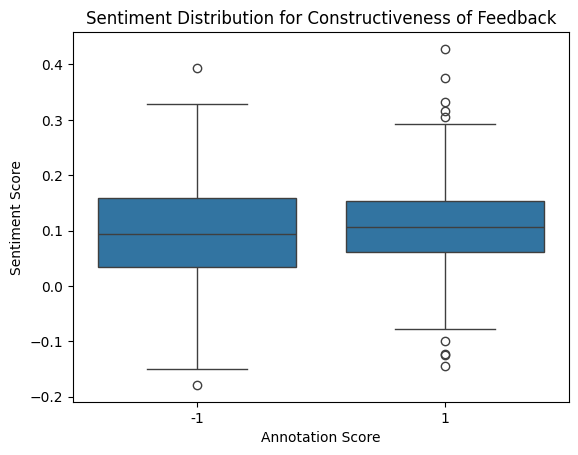

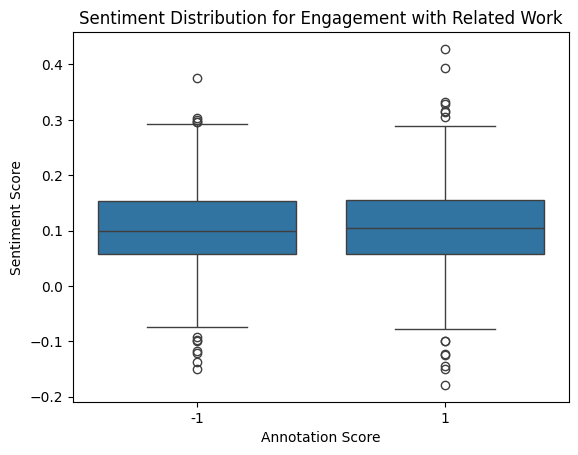

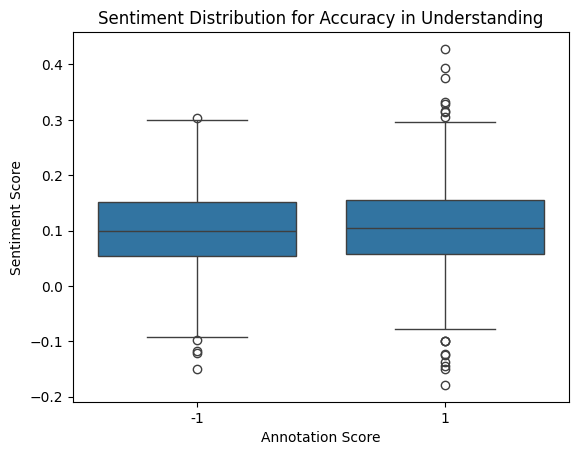

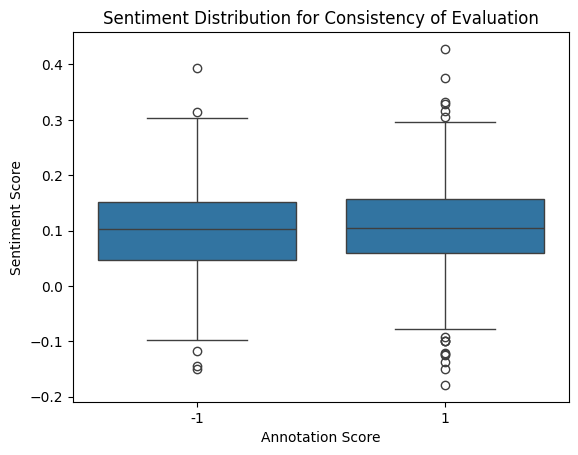

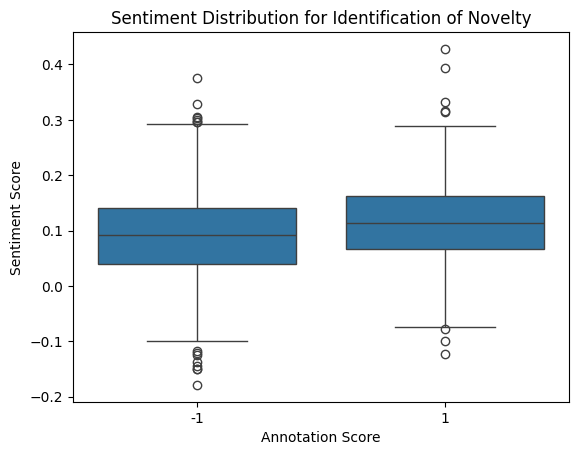

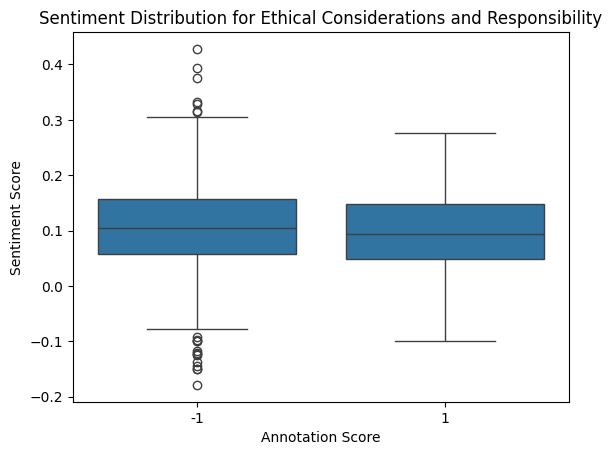

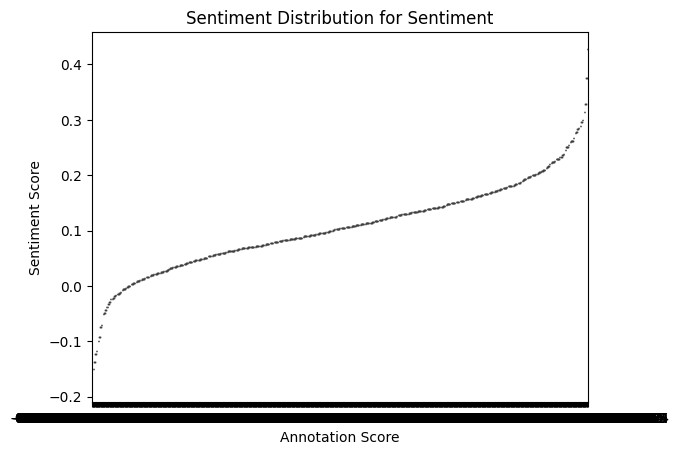

In [54]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

In [55]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                            0.545958
Justification of Scores                      0.785161
Depth of Analysis                            0.796235
Fairness and Objectivity                     0.809524
Constructiveness of Feedback                 0.574751
Engagement with Related Work                 0.517165
Accuracy in Understanding                    0.794020
Consistency of Evaluation                    0.503876
Identification of Novelty                    0.211517
Ethical Considerations and Responsibility   -0.678848
Sentiment                                    0.106114
dtype: float64

In [ ]:
final_df = df.drop(columns=['Sentiment'])

In [57]:
final_df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,1,1,1,1,-1,-1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,-1,1,1,1,1,1,1,1,1,1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,1,1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,1,1,1,-1,1,1,1,-1


In [ ]:
final_df.to_csv("../preprocessed/llama_annotated.csv")

## Mistral Dataset Review

In [59]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

In [60]:
directory = '../../datasets/preprocessed_datasets/mistral_annotations.csv'
df = pd.read_csv(directory)
df = preprocess(df)

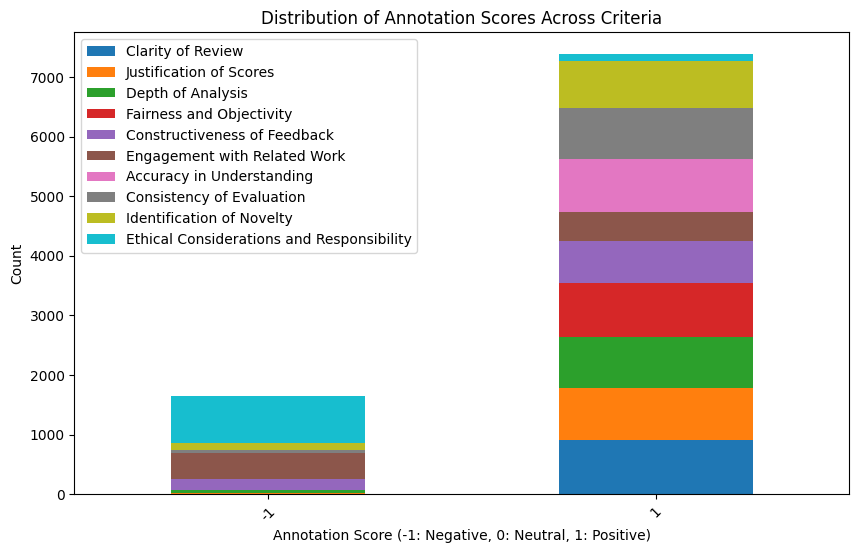

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

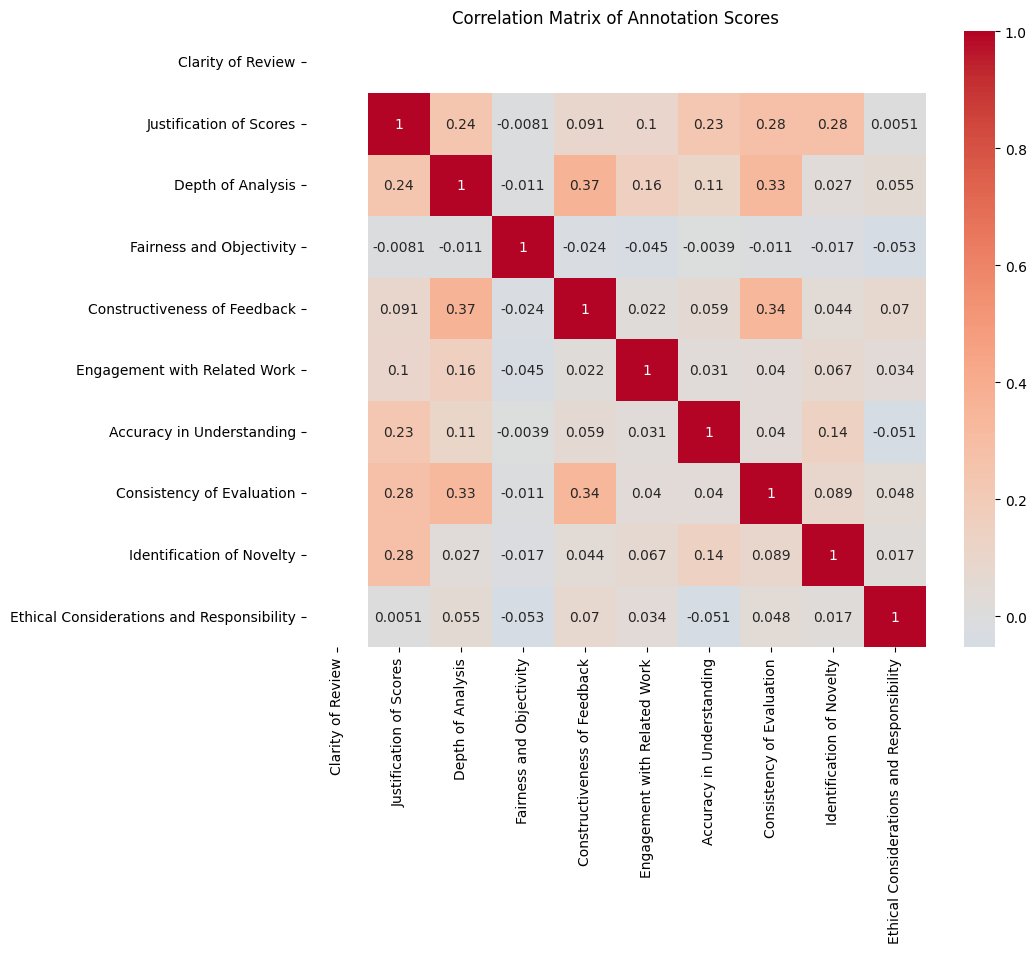

In [62]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [63]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
-1,NaN,26,44,2,188,432,6,50,109,790
1,903.0,877,859,901,715,471,897,853,794,113


In [64]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 6767), ('paper', 2786), ('authors', 1365), ('would', 1044), ('results', 1042), ('model', 1023), ('1', 927), ('proposed', 882), ('method', 877), ('learning', 841)]


In [66]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                                 NaN
Justification of Scores                      0.009423
Depth of Analysis                            0.003306
Fairness and Objectivity                     0.034214
Constructiveness of Feedback                 0.136330
Engagement with Related Work                -0.016427
Accuracy in Understanding                    0.099555
Consistency of Evaluation                   -0.003577
Identification of Novelty                    0.140847
Ethical Considerations and Responsibility   -0.008174
Name: Sentiment, dtype: float64

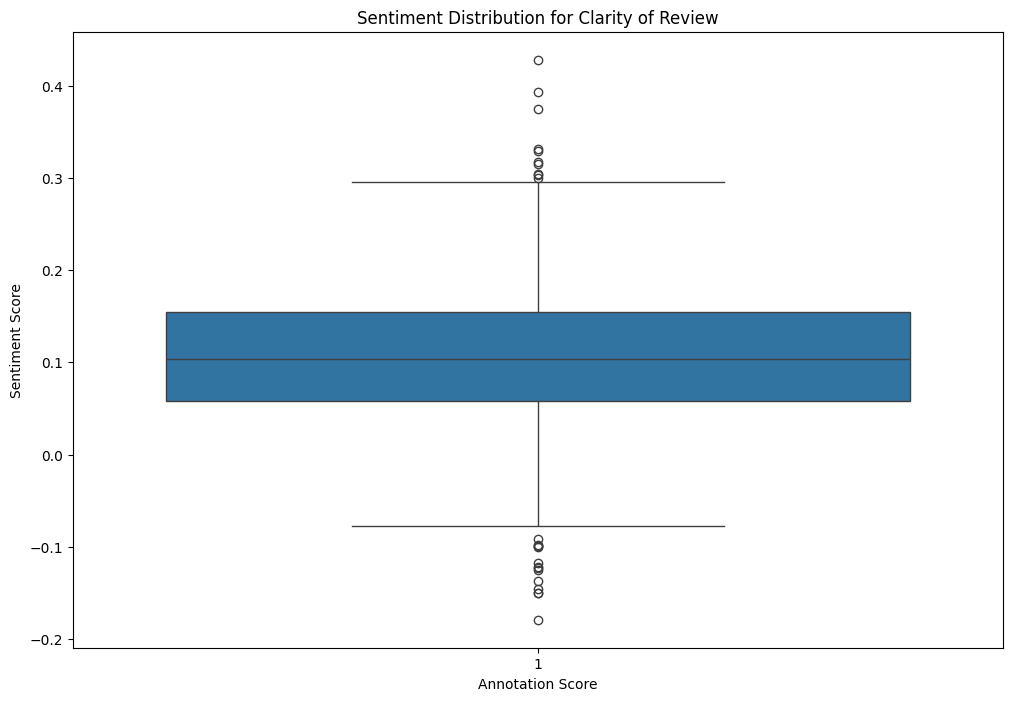

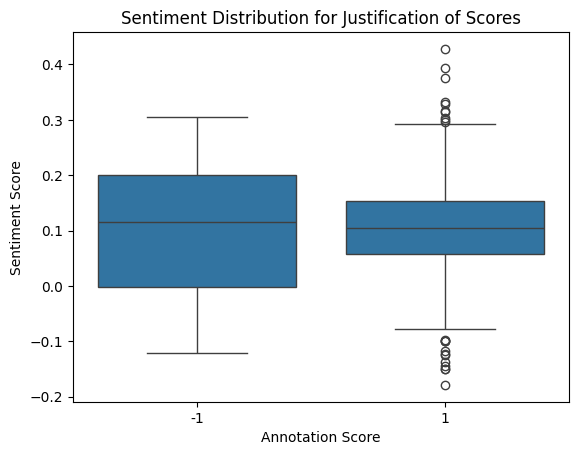

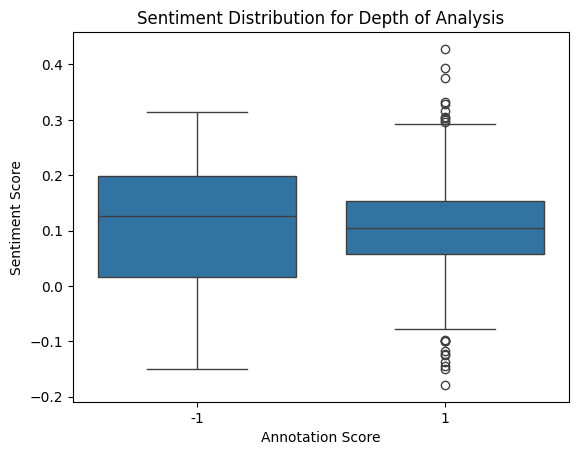

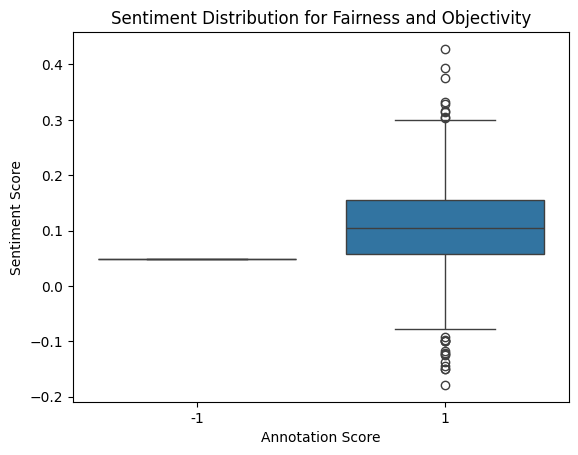

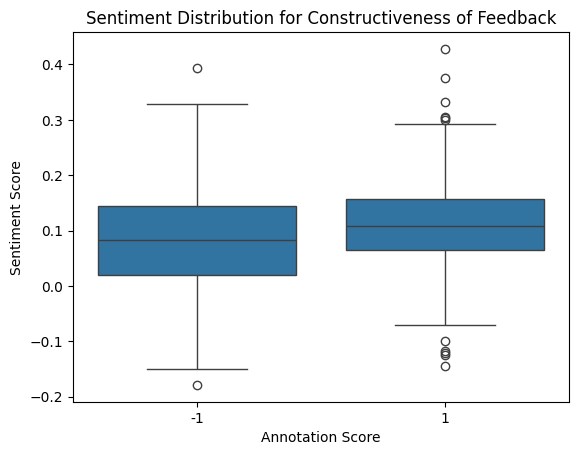

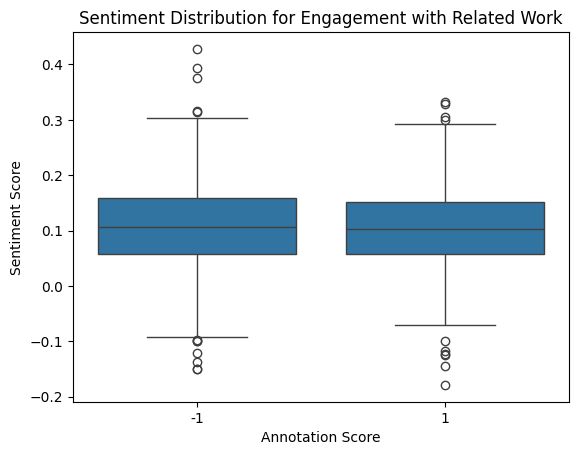

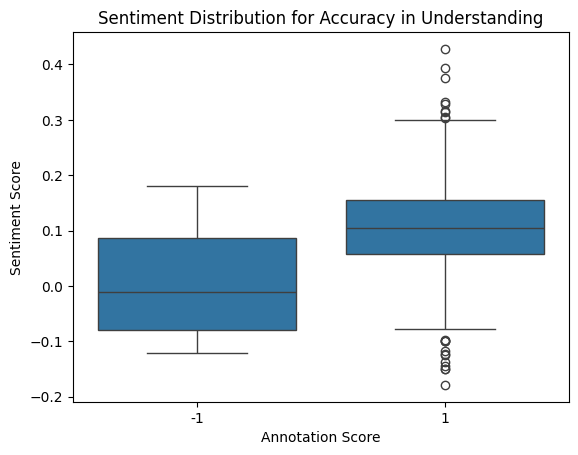

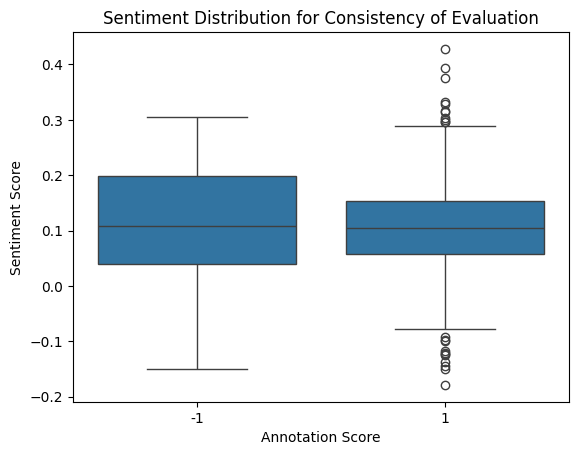

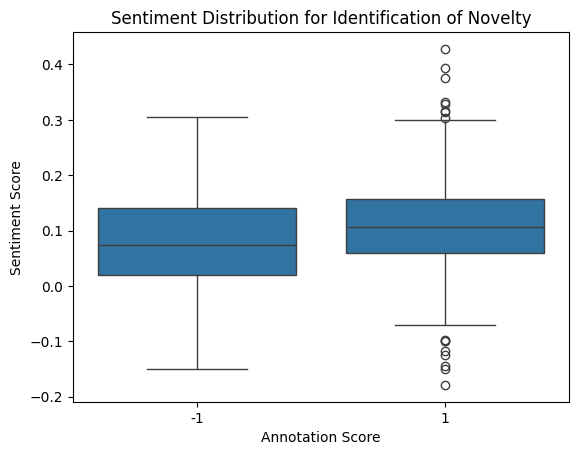

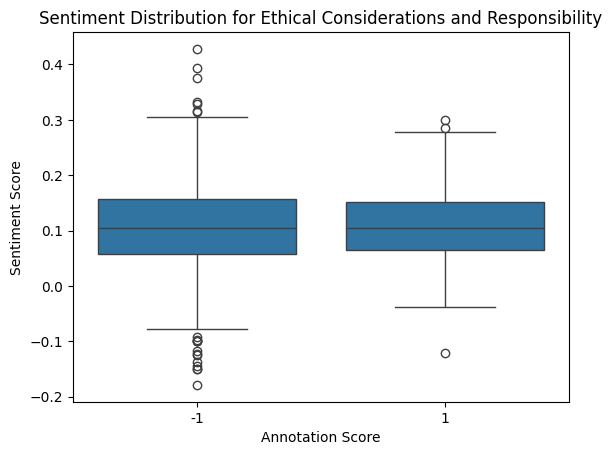

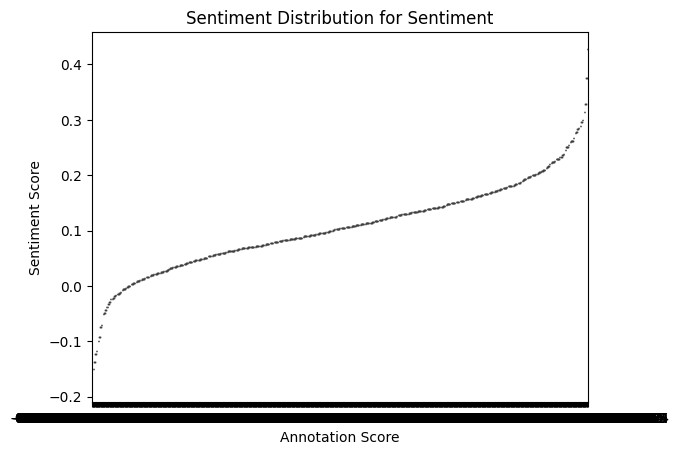

In [67]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

In [68]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                            1.000000
Justification of Scores                      0.942414
Depth of Analysis                            0.902547
Fairness and Objectivity                     0.995570
Constructiveness of Feedback                 0.583610
Engagement with Related Work                 0.043189
Accuracy in Understanding                    0.986711
Consistency of Evaluation                    0.889258
Identification of Novelty                    0.758583
Ethical Considerations and Responsibility   -0.749723
Sentiment                                    0.106114
dtype: float64

In [69]:
final_df = df.drop(columns=['Sentiment'])

In [70]:
final_df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,-1,1,1,1,1,-1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,1,1,1,1,1,1,1,1,1,-1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,1,-1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,1,1,1,1,1,1,1,1,1,1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,1,1,-1,-1,1,1,1,-1


In [71]:
final_df.to_csv("../preprocessed/mistral_annotated.csv")

## Gemini Dataset Review

In [72]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

In [73]:
directory = '../../datasets/preprocessed_datasets/gemini_annotations.csv'
df = pd.read_csv(directory)
df = preprocess(df)

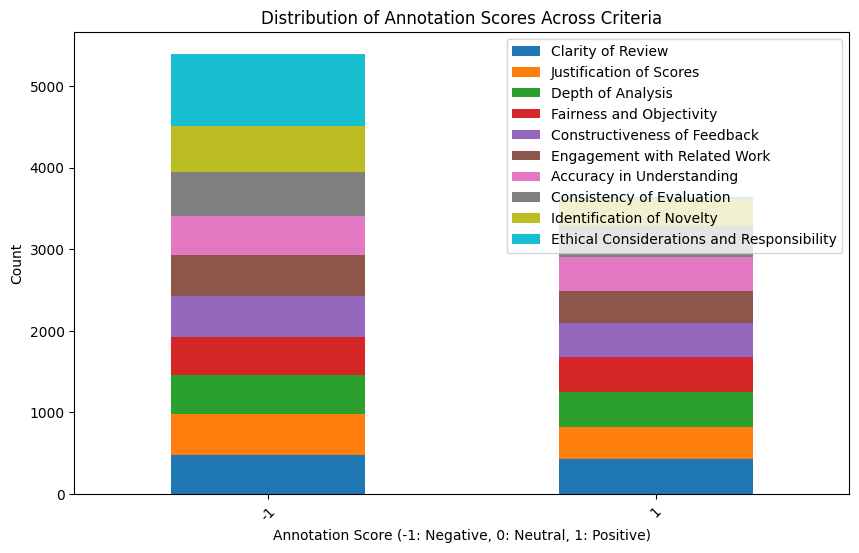

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

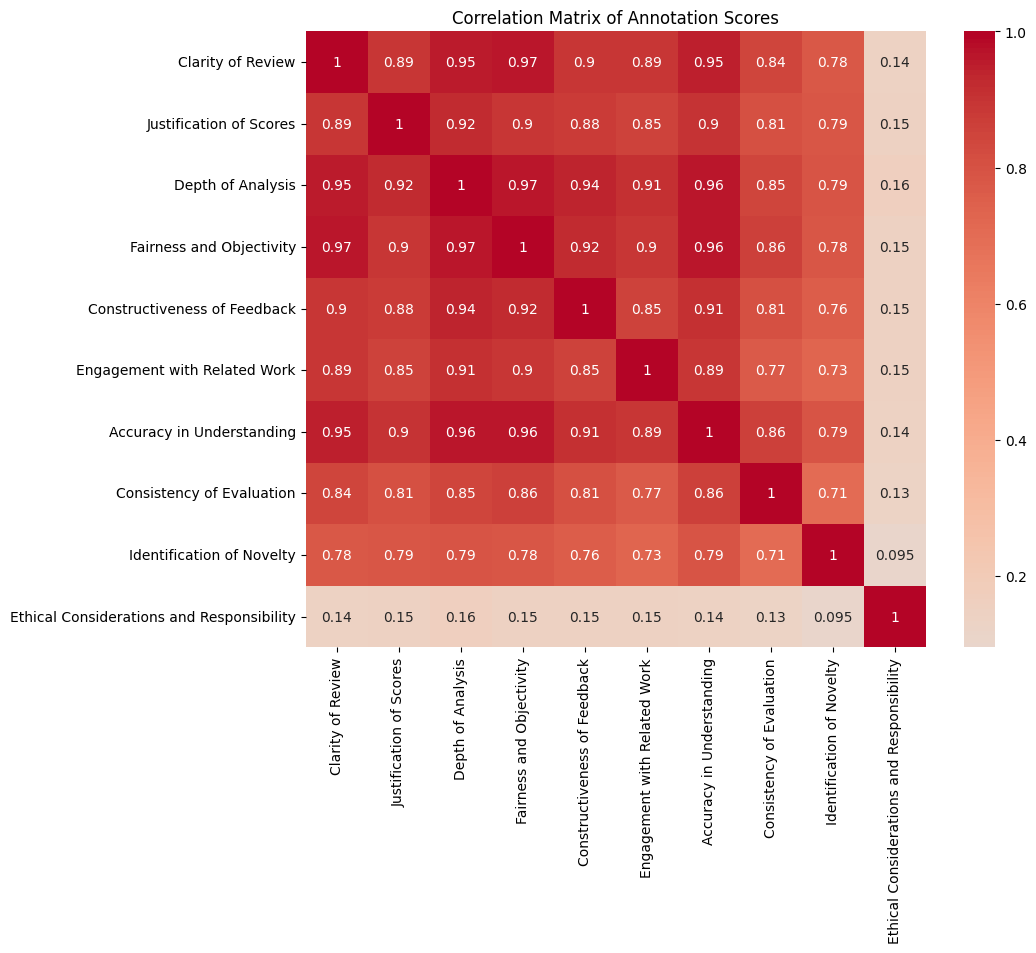

In [75]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [76]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
-1,477,509,475,466,498,508,479,529,570,878
1,426,394,428,437,405,395,424,374,333,25


In [77]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 6767), ('paper', 2786), ('authors', 1365), ('would', 1044), ('results', 1042), ('model', 1023), ('1', 927), ('proposed', 882), ('method', 877), ('learning', 841)]


In [79]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                            0.041168
Justification of Scores                      0.075898
Depth of Analysis                            0.036436
Fairness and Objectivity                     0.025299
Constructiveness of Feedback                 0.022412
Engagement with Related Work                 0.055569
Accuracy in Understanding                    0.041177
Consistency of Evaluation                    0.053613
Identification of Novelty                    0.084652
Ethical Considerations and Responsibility   -0.039965
Name: Sentiment, dtype: float64

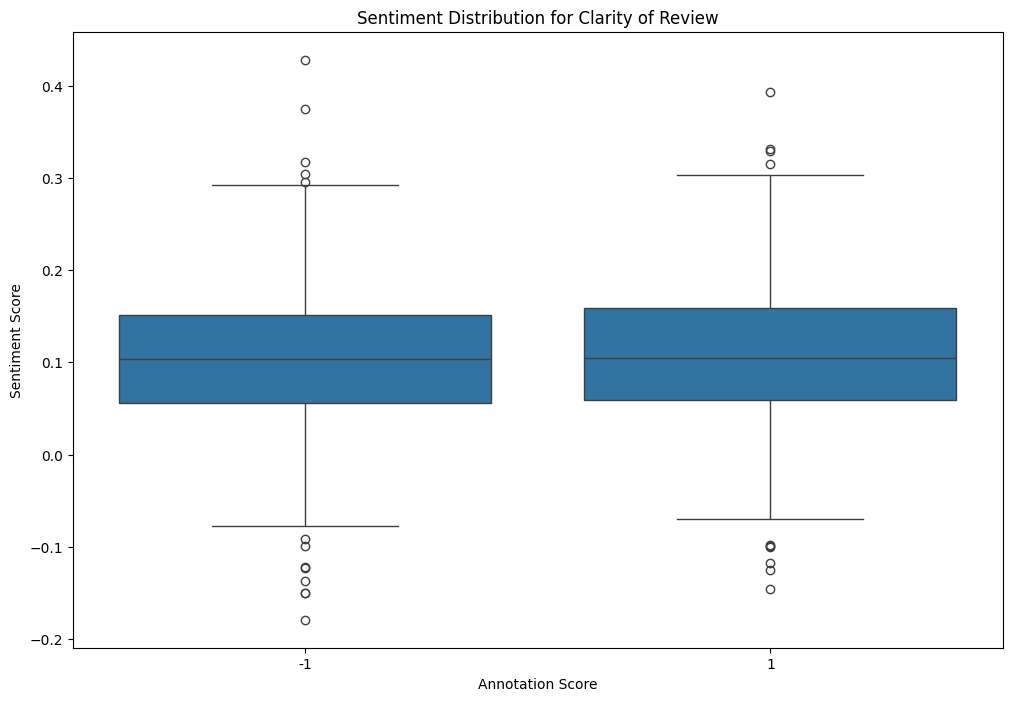

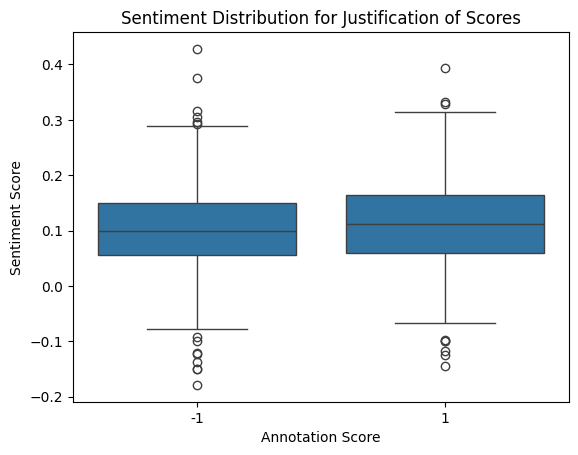

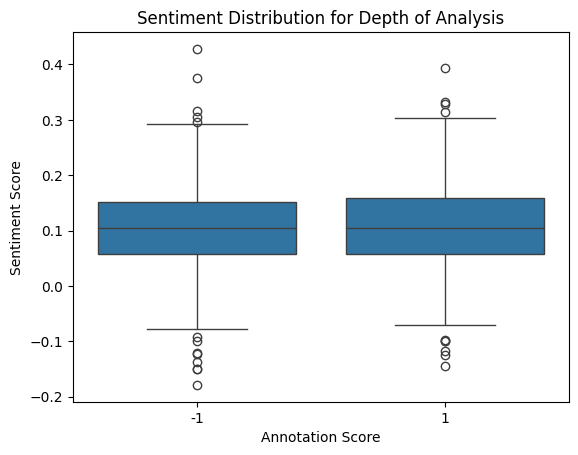

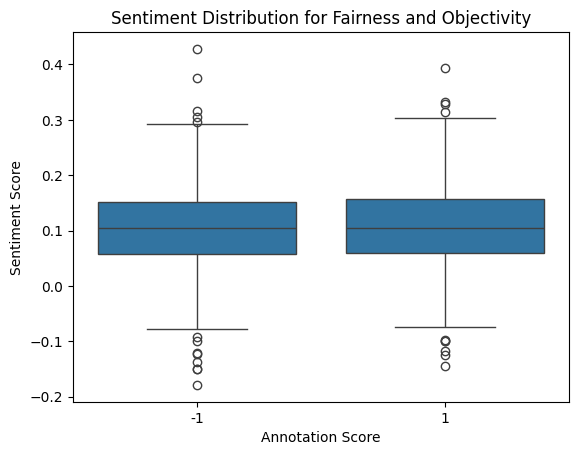

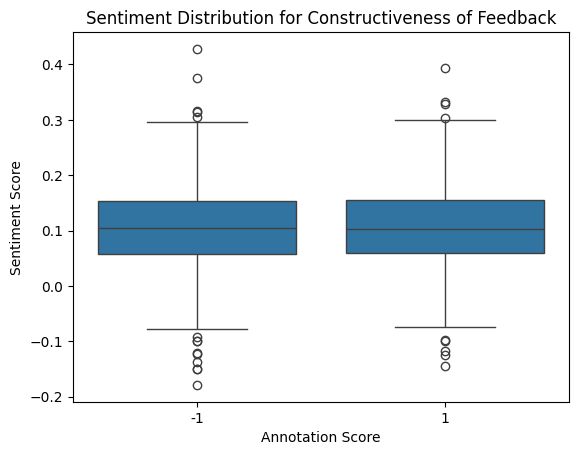

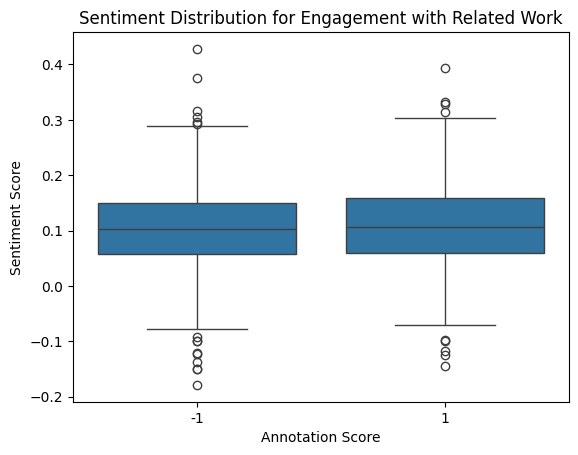

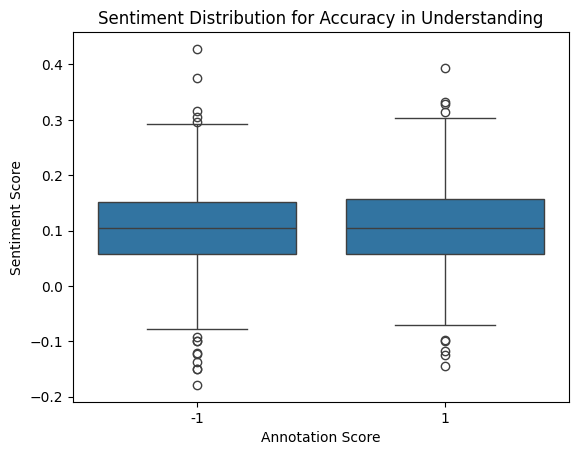

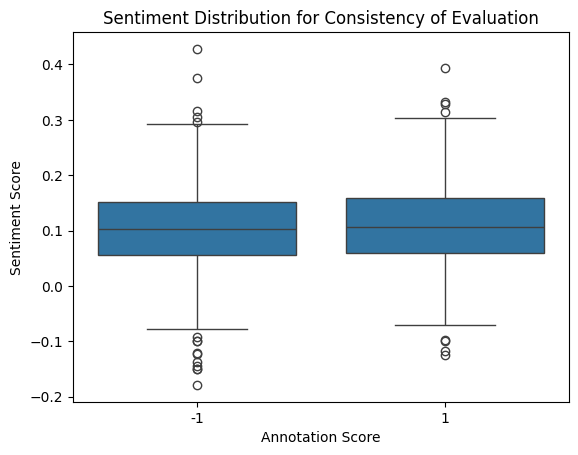

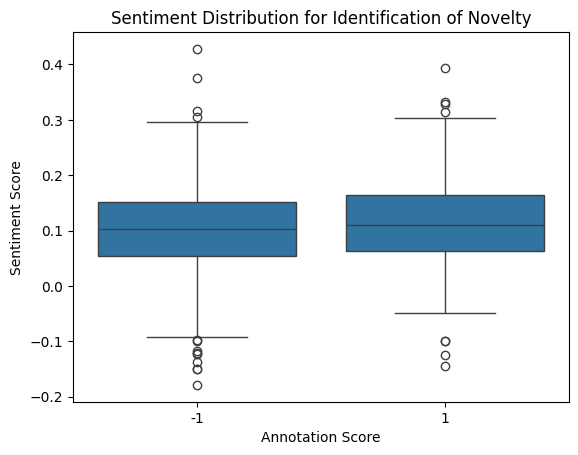

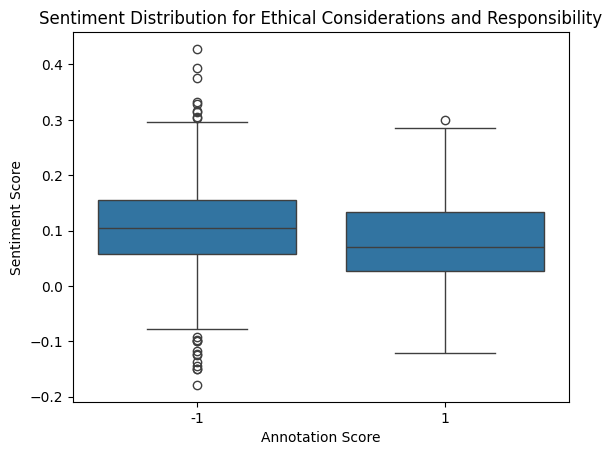

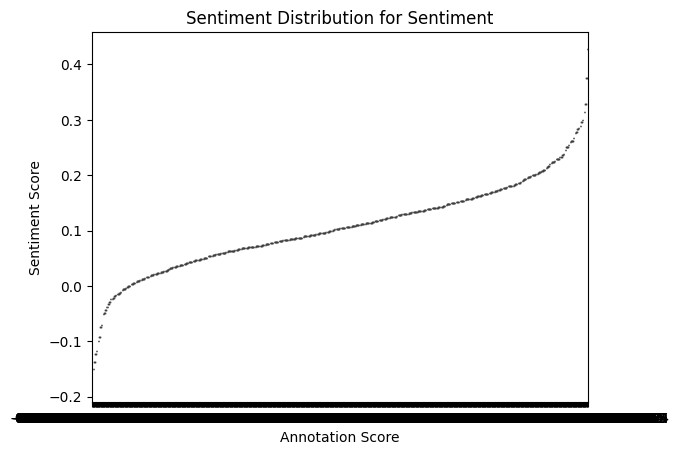

In [80]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

In [81]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                           -0.056478
Justification of Scores                     -0.127353
Depth of Analysis                           -0.052049
Fairness and Objectivity                    -0.032115
Constructiveness of Feedback                -0.102990
Engagement with Related Work                -0.125138
Accuracy in Understanding                   -0.060908
Consistency of Evaluation                   -0.171650
Identification of Novelty                   -0.262458
Ethical Considerations and Responsibility   -0.944629
Sentiment                                    0.106114
dtype: float64

In [82]:
final_df = df.drop(columns=['Sentiment'])

In [83]:
final_df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,1,1,1,1,1,1,1,-1


In [84]:
final_df.to_csv("../preprocessed/gemini_annotated.csv")

## GPT Dataset Review

In [85]:
metrics = ['Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 'Ethical Considerations and Responsibility']

In [86]:
directory = '../../datasets/preprocessed_datasets/gpt_annotations.csv'
df = pd.read_csv(directory)
df = preprocess(df)

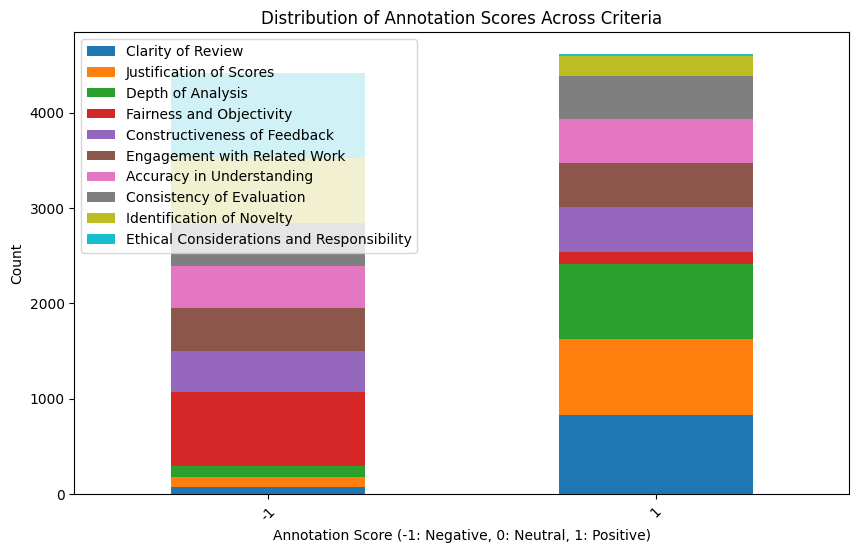

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

score_distribution = df[metrics].apply(pd.Series.value_counts)

score_distribution.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Distribution of Annotation Scores Across Criteria')
plt.xlabel('Annotation Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

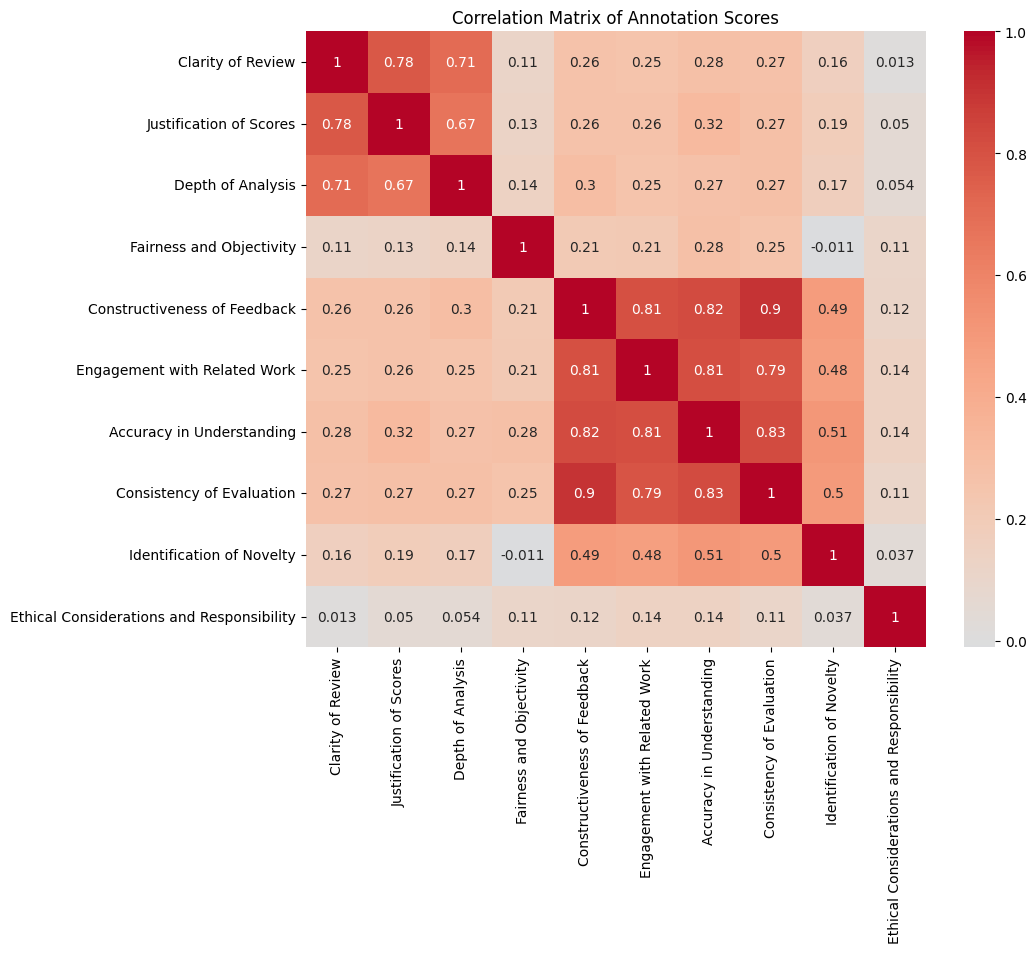

In [88]:
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Annotation Scores')
plt.show()

In [89]:
score_counts = df[metrics].apply(lambda col: col.value_counts())
score_counts

,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
-1,77,103,118,776,428,446,442,453,686,886
1,826,800,785,127,475,457,461,450,217,17


In [90]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
from collections import Counter
import re

def tokenize_text(text):
    if isinstance(text, str): 
        tokens = re.findall(r'\b\w+\b', text.lower())
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    return []

all_words = df['Text'].apply(tokenize_text).sum()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))

Most common words: [('n', 6767), ('paper', 2786), ('authors', 1365), ('would', 1044), ('results', 1042), ('model', 1023), ('1', 927), ('proposed', 882), ('method', 877), ('learning', 841)]


In [92]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return None

df['Sentiment'] = df['Text'].apply(get_sentiment)
metrics.append("Sentiment")
correlation_with_sentiment = df[metrics].corr()['Sentiment'].drop('Sentiment')
correlation_with_sentiment

Clarity of Review                            0.175276
Justification of Scores                      0.191242
Depth of Analysis                            0.163045
Fairness and Objectivity                    -0.078004
Constructiveness of Feedback                 0.082039
Engagement with Related Work                 0.072429
Accuracy in Understanding                    0.100365
Consistency of Evaluation                    0.076693
Identification of Novelty                    0.159448
Ethical Considerations and Responsibility    0.033775
Name: Sentiment, dtype: float64

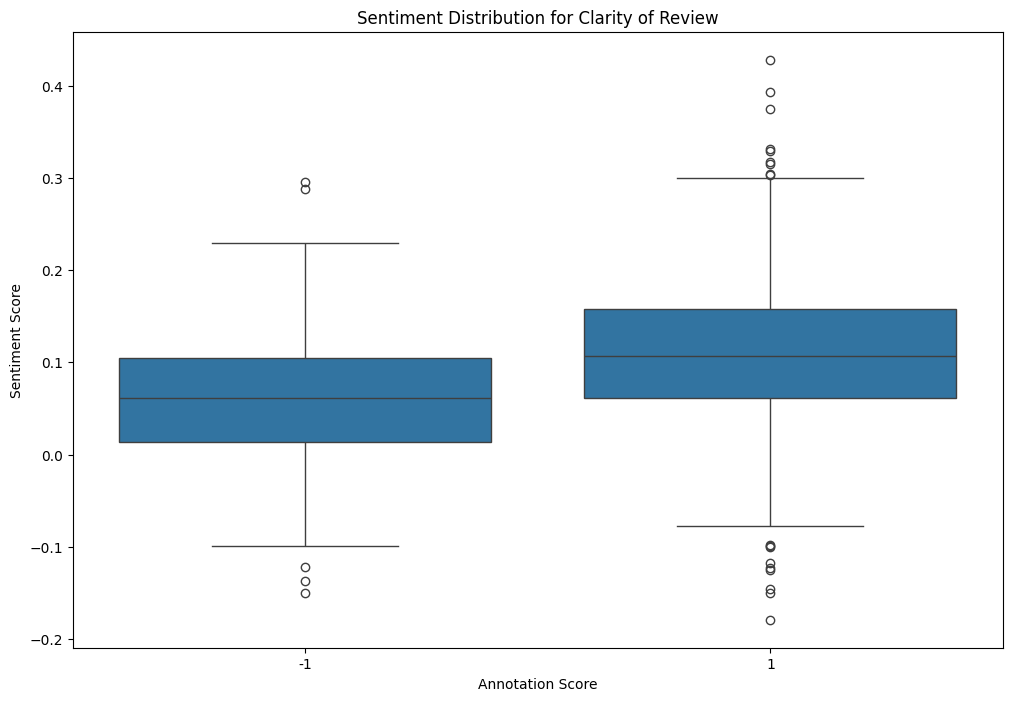

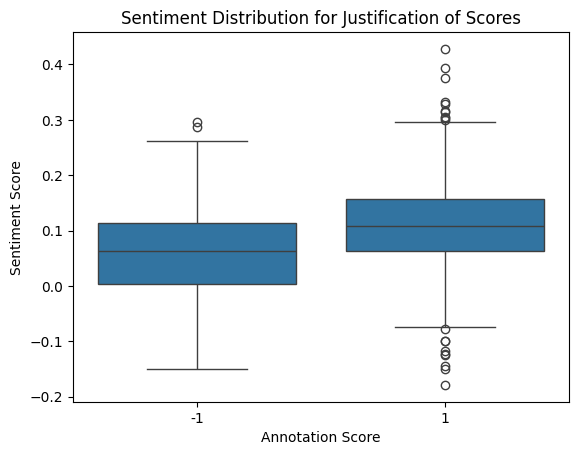

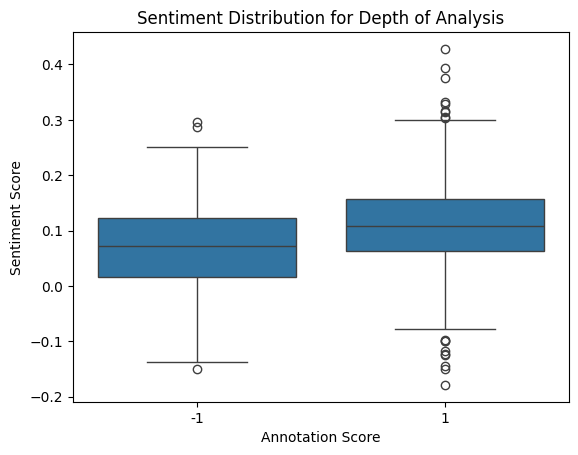

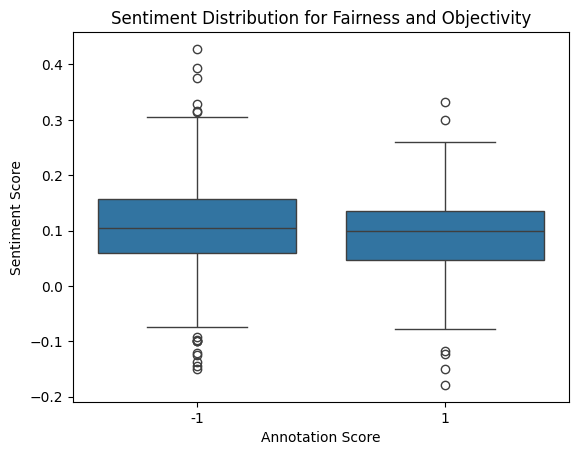

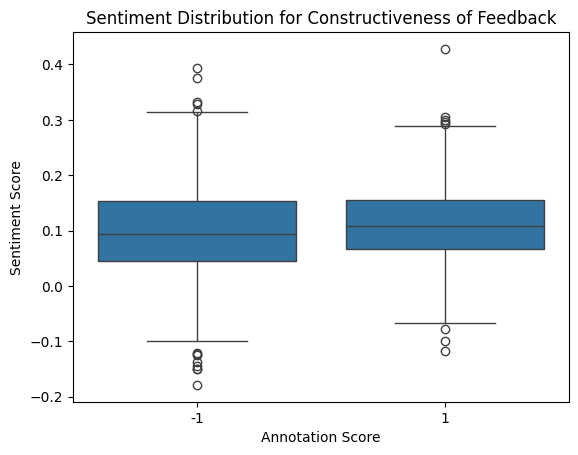

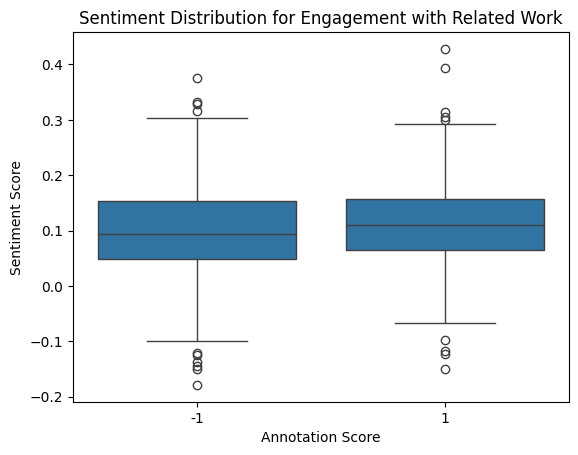

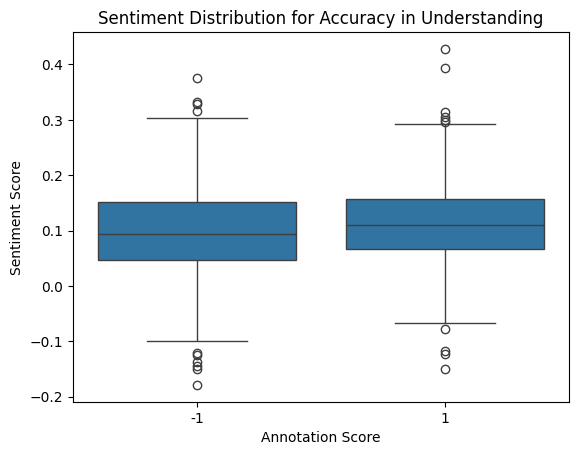

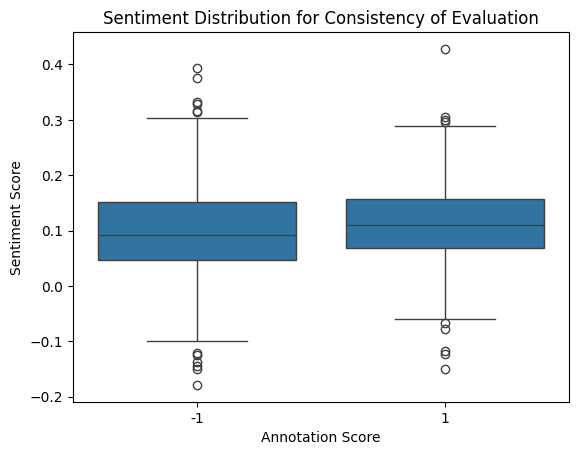

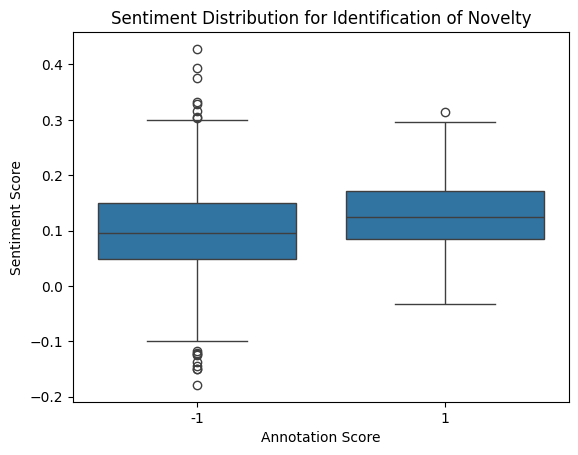

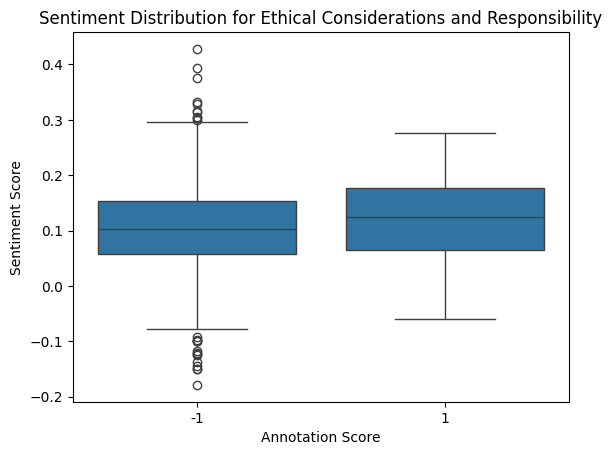

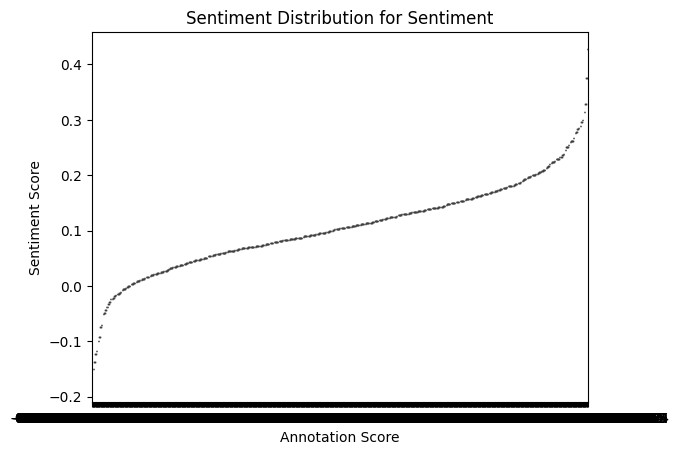

In [93]:
plt.figure(figsize=(12, 8))
for criterion in metrics:
    sns.boxplot(data=df, x=criterion, y='Sentiment')
    plt.title(f'Sentiment Distribution for {criterion}')
    plt.xlabel('Annotation Score')
    plt.ylabel('Sentiment Score')
    plt.show()

In [94]:
mean_scores = df[metrics].mean()
print("Mean scores for each criterion:")
mean_scores

Mean scores for each criterion:


Clarity of Review                            0.829457
Justification of Scores                      0.771872
Depth of Analysis                            0.738649
Fairness and Objectivity                    -0.718715
Constructiveness of Feedback                 0.052049
Engagement with Related Work                 0.012182
Accuracy in Understanding                    0.021041
Consistency of Evaluation                   -0.003322
Identification of Novelty                   -0.519380
Ethical Considerations and Responsibility   -0.962348
Sentiment                                    0.106114
dtype: float64

In [95]:
final_df = df.drop(columns=['Sentiment'])

In [96]:
final_df.head()

,Index,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility
0,B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,-1,1,1,1,-1,-1
1,B11bwYgfM-R2,This paper proposes a method for multitask and...,1,1,1,1,1,1,1,1,-1,-1
2,B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,-1,-1
3,B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,1,1,1,-1,-1,-1,-1,-1,-1,-1
4,B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,1,-1,-1,-1,-1,-1,-1,-1


In [97]:
final_df.to_csv("../preprocessed/gpt_annotated.csv")

In [98]:
final_df.columns

Index(['Index', 'Text', 'Clarity of Review', 'Justification of Scores',
       'Depth of Analysis', 'Fairness and Objectivity',
       'Constructiveness of Feedback', 'Engagement with Related Work',
       'Accuracy in Understanding', 'Consistency of Evaluation',
       'Identification of Novelty',
       'Ethical Considerations and Responsibility'],
      dtype='object')